<a href="https://colab.research.google.com/github/O-Aiden/CartoonGuidetoStatisticsByPython/blob/main/14%E3%80%8A%E6%BC%AB%E7%94%BB%E7%BB%9F%E8%AE%A1%E5%AD%A6%E4%B9%8B%E5%9B%A0%E5%AD%90%E5%88%86%E6%9E%90%E3%80%8Bpython%E5%AE%9E%E7%8E%B0_%E7%9F%A9%E9%98%B5%E7%9B%B8%E5%85%B3%E8%AE%A1%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

data = pd.read_excel('汽车企业销量数据.xlsx',index_col=0)
data.head(5)

,企业,2021-05-01 00:00:00,2021-04-01 00:00:00,2021-03-01 00:00:00,2021-02-01 00:00:00,2021-01-01 00:00:00,2020-12-01 00:00:00,2021年,2020年,2019年
序号,,,,,,,,,,
1,上海大众,110000,108301,112500,50500,86100,157520,467401,1505559,1812637
2,一汽-大众,111518,83026,147729,77078,135278,133439,554629,1415462,1416775
3,吉利汽车,96581,100846,100285,77319,156828,154929,531859,1315408,1362608
4,上汽通用,69729,66927,110354,65552,107795,166082,420357,1271652,1510456
5,东风日产,79277,84499,76955,54224,114233,127923,409188,1119008,1159108


# 相关系数矩阵

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


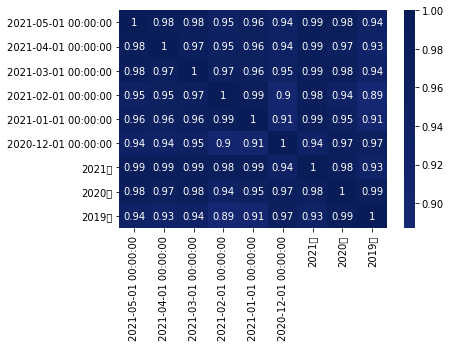

In [10]:
import pandas as pd
import matplotlib.pyplot as mp, seaborn
df = data
df_corr = df.corr()
# 可视化
seaborn.heatmap(df_corr, center=0, annot=True, cmap='YlGnBu')
mp.show()


# 单位矩阵

In [18]:
import numpy as np

## 方法一
# 矩阵大小由数字决定
# dtype决定数据类型，默认浮点型
np.mat(np.identity(3, dtype = float))

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [26]:
## 方法二
iden = np.mat(np.eye(3, dtype = float))
iden

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [29]:
## 矩阵简单计算
# 生成普通矩阵
matrix = np.array([[6,4],[1,-9],[3,-7]])
# 矩阵计算
np.dot(iden,matrix)

matrix([[ 6.,  4.],
        [ 1., -9.],
        [ 3., -7.]])

In [31]:
## 矩阵简单计算
# 生成普通矩阵
matrix = np.array([[6,4],[1,-9],[3,-7]])
# 矩阵计算
np.dot(matrix,np.mat(np.eye(2, dtype = float)))

matrix([[ 6.,  4.],
        [ 1., -9.],
        [ 3., -7.]])

# 旋转

In [53]:
import math

matrix1 = np.array([[round(math.cos(math.pi/2)),-math.sin(math.pi/2)],[math.sin(math.pi/2),round(math.cos(math.pi/2))]])
print('matrix1: ',matrix1)

matrix2 = np.array([[math.sqrt(3)],[1]])
print('matrix2: ',matrix2)

print('旋转后： ',np.dot(matrix1,matrix2))

matrix1:  [[ 0. -1.]
 [ 1.  0.]]
matrix2:  [[1.73205081]
 [1.        ]]
旋转后：  [[-1.        ]
 [ 1.73205081]]


# 特征值和特征向量

In [76]:

a = np.diag((2,4,6)) # 一个对角矩阵
w, v = np.linalg.eig(a)
# 其中特征值为w,特征向量为v
print('特征值: ', w)
print('特征向量: ', v)


特征值:  [2. 4. 6.]
特征向量:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# 对称矩阵

In [77]:
import numpy as np
# step 1：创建一个方阵
X = np.random.rand(5**2).reshape(5, 5)
# step 2：保留其上三角部分
X = np.triu(X)
#step 3：将上三角”拷贝”到下三角部分
X += X.T - np.diag(X.diagonal())
X

array([[0.31860966, 0.58717131, 0.64846612, 0.03582108, 0.10250689],
       [0.58717131, 0.7019595 , 0.06866675, 0.20619333, 0.70226371],
       [0.64846612, 0.06866675, 0.09862366, 0.32672388, 0.81764872],
       [0.03582108, 0.20619333, 0.32672388, 0.56044235, 0.51202707],
       [0.10250689, 0.70226371, 0.81764872, 0.51202707, 0.06804219]])

In [78]:
# 利用对称矩阵的性质进行，测试
X.T == X

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

# 逆矩阵

In [82]:
matrix = np.array([[1,2],[3,4]])
np.linalg.inv(matrix)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [83]:
# 定义一个奇异阵 A
A = np.zeros((4, 4))
A[0, -1] = 1
A[-1, 0] = -1
A = np.matrix(A)
print(A)
# print(A.I)  将报错，矩阵 A 为奇异矩阵，不可逆
print(np.linalg.pinv(a))   # 求矩阵 A 的伪逆（广义逆矩阵），对应于MATLAB中 pinv()

[[ 0.  0.  0.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [-1.  0.  0.  0.]]
[[0.5        0.         0.        ]
 [0.         0.25       0.        ]
 [0.         0.         0.16666667]]


# 转置矩阵

In [84]:
matrix = np.array([[1,2],[3,4]])
matrix.T

array([[1, 3],
       [2, 4]])